<a href="https://colab.research.google.com/github/Stephyj2/Capstone-Project_1-ML/blob/main/Capstone_Project1_(Banking_domain).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project: Customer Targeting: Predicting Term Deposit Subscriptions in Bank Marketing**

###**Business Objective:**

The goal is to develop a predictive model to classify whether a client will subscribe to a term deposit based on demographic, socio-economic, and campaign-related factors.

The data file contains 41118 customers information and 21 columns



####**Variable Descriptions**
1.	**age:** (Numeric) Age of the client.
2.	**job:** (Categorical) Type of job (e.g., admin, technician, blue-collar, etc.).
3.	**marital:** (Categorical) Marital status (e.g., married, single, divorced).
4.	**education:** (Categorical) Education level of the client (e.g., primary, secondary, tertiary, unknown).
5.	**default:** (Binary) Whether the client has credit in default (yes/no).
6.	**housing:** (Binary) Whether the client has a housing loan (yes/no).
7.	**loan:** (Binary) Whether the client has a personal loan (yes/no).
8.	**contact:** (Categorical) Contact communication type (e.g., cellular, telephone).
9.	**month:** (Categorical) Last contact month of the year (e.g., January, February).
10.	**day_of_week:** (Categorical) Last contact day of the week (e.g., Monday, Tuesday).
11.	**duration:** (Numeric) Last contact duration, in seconds. Note: This feature is highly predictive but should be handled carefully in predictive modelling.
12.	**campaign:** (Numeric) Number of contacts performed during this campaign and for this client (includes the last contact).
13.	**pdays:** (Numeric) Number of days since the client was last contacted from a previous campaign. -1 means the client was not previously contacted.
14.	**previous:** (Numeric) Number of contacts performed before this campaign and for this client.
15.	**poutcome:** (Categorical) Outcome of the previous marketing campaign (e.g., success, failure, unknown, non-existent).
16.	**emp_var_rate:** (Numeric) Employment variation rate (quarterly indicator).
17.	**cons_price_idx:** (Numeric) Consumer price index (monthly indicator).
18.	**cons_conf_idx:** (Numeric) Consumer confidence index (monthly indicator).
19.	**euribor3m:** (Numeric) Euribor 3-month rate.
20.	**nr_employed:** (Numeric) Number of employees (quarterly indicator).
21.	**y:** (Binary) Target variable indicating whether the client subscribed to a term deposit (yes/no).


### **Problem Statement:**
Using the provided data, develop a classification model that predicts whether a client will subscribe to a term deposit (yes/no) based on personal characteristics, contact details, and economic indicators. This model can help the bank improve its marketing strategy by identifying the characteristics of clients who are likely to respond positively to marketing campaigns, thereby enhancing campaign effectiveness and customer acquisition.

**Acceptance Criterion:**
Need to deploy the end results using Flask /Streamlit.etc.



#**Initial Observations:**
1. ### **Demographic & Socio-economic Factors:**
- **age:** Integer
- **job:** Categorical (e.g., "blue-collar", "technician", "management")
- **marital:** Categorical (e.g., "married", "single")
- **education:** Categorical (e.g., "basic.4y", "university.degree")
- **default, housing, loan:** Categorical (e.g., "yes", "no", "unknown")

2. ### **Campaign-related Factors:**
- **contact:** Categorical (e.g., "cellular", "telephone")
- **month, day_of_week:** Categorical (e.g., "aug", "thu")
- **duration, campaign, pdays, previous:** Numeric

3. ### **Economic Indicators:**
- **emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed:** Numeric


###**Step 1: Data Exploration**

**1. Load the dataset and perform exploratory data analysis (EDA)**

In [24]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#Load banking dataset
data_fd = pd.read_csv("/content/drive/MyDrive/banking.csv")
#First few rows
data_fd.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [27]:
#Number of columns in the dataset
data_fd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [28]:
#Datatypes of the columns
data_fd.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


**Dataset Structure:**
- Numerical Features: 11 columns (int64, float64)
- Categorical Features: 10 columns (object)

In [29]:
#Typcasting
# Convert categorical columns to the 'category' data type
categorical_features = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']
# Typecasting categorical columns
for feature in categorical_features:
    data_fd[feature] = data_fd[feature].astype('category')

In [30]:
# Convert the target variable 'y' to category as well
data_fd['y'] = data_fd['y'].astype('category')

In [31]:
#Number of rows and columns
data_fd.shape

(41188, 21)

**The data file contains 41118 customers information and 21 columns**

In [32]:
#Info of dataset
data_fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp_var_rate    41188 non-null  float64 
 16  cons_price_idx  41188 non-null  float64 
 17  cons_conf_id

### **Step 2:Data Preprocessing**

In [33]:
#To check for missing values
data_fd.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


**No missing values**

In [34]:
#Summary statistics
data_fd.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- **Age:** The average age is around 40 years, with a range from 17 to 98 years.
Duration: Call duration varies widely, with a mean of 258 seconds and a maximum of 4918 seconds.
- **Campaign:** Number of contacts made during the current campaign, with a median of 2 contacts.
- **Pdays:** The number of days that passed after the client was last contacted from a previous campaign, where 999 indicates the client was not previously contacted.
- **Emp_var_rate, Cons_price_idx, Cons_conf_idx, Euribor3m, Nr_employed:** Various economic indicators with different ranges.

####**2.1 Univariate Numerical variable analysis**

In [35]:
#numerical columns in dataset
df_fd_numerical = data_fd.select_dtypes(include=['int64', 'float64'])
df_fd_numerical.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2


In [36]:
#numerical data mean and median
df_fd_numerical.mean(),df_fd_numerical.median()

(age                 40.024060
 duration           258.285010
 campaign             2.567593
 pdays              962.475454
 previous             0.172963
 emp_var_rate         0.081886
 cons_price_idx      93.575664
 cons_conf_idx      -40.502600
 euribor3m            3.621291
 nr_employed       5167.035911
 dtype: float64,
 age                 38.000
 duration           180.000
 campaign             2.000
 pdays              999.000
 previous             0.000
 emp_var_rate         1.100
 cons_price_idx      93.749
 cons_conf_idx      -41.800
 euribor3m            4.857
 nr_employed       5191.000
 dtype: float64)

In [37]:
for col in df_fd_numerical.columns:
      print("range of {}{}{}{}{}{}{}{}".format(col,":"," ","[",df_fd_numerical[col].min(), ", ",df_fd_numerical[col].max(),"]"))

range of age: [17, 98]
range of duration: [0, 4918]
range of campaign: [1, 56]
range of pdays: [0, 999]
range of previous: [0, 7]
range of emp_var_rate: [-3.4, 1.4]
range of cons_price_idx: [92.201, 94.767]
range of cons_conf_idx: [-50.8, -26.9]
range of euribor3m: [0.634, 5.045]
range of nr_employed: [4963.6, 5228.1]


In [38]:
for col in df_fd_numerical.columns:
      print("Standard deviation and varince of {}{}{}{}{}{}{}{}".format(col,":"," ","[",df_fd_numerical[col].std(), ", ",df_fd_numerical[col].var(),"]"))

Standard deviation and varince of age: [10.421249980934048, 108.60245116511788]
Standard deviation and varince of duration: [259.2792488364648, 67225.72887720143]
Standard deviation and varince of campaign: [2.770013542902328, 7.672975027862306]
Standard deviation and varince of pdays: [186.91090734474176, 34935.68728443464]
Standard deviation and varince of previous: [0.4949010798392897, 0.244927078826095]
Standard deviation and varince of emp_var_rate: [1.5709597405170255, 2.4679145063253203]
Standard deviation and varince of cons_price_idx: [0.5788400489541262, 0.3350558022732152]
Standard deviation and varince of cons_conf_idx: [4.628197856174544, 21.42021539589864]
Standard deviation and varince of euribor3m: [1.7344474048512668, 3.0083078001952943]
Standard deviation and varince of nr_employed: [72.25152766826108, 5220.283250397495]


In [39]:
for col in df_fd_numerical.columns:
      print("Kurtosis and Skewness of {}{}{}{}{}{}{}{}".format(col,":"," ","[",df_fd_numerical[col].kurt(), ", ",df_fd_numerical[col].skew(),"]"))

Kurtosis and Skewness of age: [0.7913115311544332, 0.7846968157646645]
Kurtosis and Skewness of duration: [20.24793801497879, 3.2631412552628314]
Kurtosis and Skewness of campaign: [36.979795142898844, 4.762506697067007]
Kurtosis and Skewness of pdays: [22.229462626355353, -4.922189916418164]
Kurtosis and Skewness of previous: [20.108816215208236, 3.8320422428611836]
Kurtosis and Skewness of emp_var_rate: [-1.0626315246508395, -0.7240955492472559]
Kurtosis and Skewness of cons_price_idx: [-0.8298085771833641, -0.2308876513578066]
Kurtosis and Skewness of cons_conf_idx: [-0.35855831054052567, 0.3031798587481924]
Kurtosis and Skewness of euribor3m: [-1.406802622387499, -0.7091879563778299]
Kurtosis and Skewness of nr_employed: [-0.0037603756956317014, -1.044262407089151]


In [18]:
#Detecting Outliers
outliers = {}

for col in df_fd_numerical: # Iterate over the Index object directly
    Q1 = np.quantile(df_fd_numerical[col], 0.25)
    Q3 = np.quantile(df_fd_numerical[col], 0.75)
    IQR = (Q3 - Q1)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_fd_numerical[(df_fd_numerical[col] < lower_bound) | (df_fd_numerical[col] > upper_bound)][col]

# Print the outliers
for col, values in outliers.items():
    if not values.empty:
        print(f"Outliers in {col}:\n{values}\n")
    else:
        print(f"No outliers in {col}\n")

Outliers in age:
43       72
307      74
334      80
454      72
559      75
         ..
40901    88
40905    76
40906    75
41001    82
41123    80
Name: age, Length: 469, dtype: int64

Outliers in duration:
11        789
14       1021
16       1034
21       1114
28        746
         ... 
41115    1111
41130    1111
41162     902
41171     956
41172    1309
Name: duration, Length: 2963, dtype: int64

Outliers in campaign:
5         8
38       25
39       11
59       12
75       18
         ..
41007    11
41020    12
41048     8
41064     8
41069     8
Name: campaign, Length: 2406, dtype: int64

Outliers in pdays:
2        6
4        3
8        3
27       2
71       4
        ..
40991    3
41001    3
41078    6
41111    6
41135    3
Name: pdays, Length: 1515, dtype: int64

Outliers in previous:
2        2
4        1
8        1
9        1
20       1
        ..
41135    2
41150    1
41151    1
41153    1
41182    1
Name: previous, Length: 5625, dtype: int64

No outliers in emp_var_rate

No outliers were detected in:
-	emp_var_rate
-	cons_price_idx
-	euribor3m
-	nr_employed


In [40]:
'''
Age: Caps ages greater than 72 to 72.
Duration: Applied a log transformation to reduce the skewness.
Campaign: Capped the campaign feature at its 95th percentile.
Pdays: Created a new feature pdays_new that labels contacts as "Not Contacted" (999) or "Contacted."
Previous: Bins the previous contacts into categories (No Contact, 1-2, 3-5, and 5+).
Cons_conf_idx: Caps extreme negative values at the 5th percentile.
'''
#Treating outliers
def treat_outliers(df):
    # 1. Age: Cap at 72
    df['age'] = np.where(df['age'] > 72, 72, df['age'])

    # 2. Duration: Log transformation
    df['duration'] = np.log(df['duration'] + 1)  # Adding 1 to avoid log(0)

    # 3. Campaign: Cap at the 95th percentile
    campaign_cap = df['campaign'].quantile(0.95)
    df['campaign'] = np.where(df['campaign'] > campaign_cap, campaign_cap, df['campaign'])

    # 4. Pdays: Create a new category for 999 and bin the rest
    df['pdays_new'] = np.where(df['pdays'] == 999, 'Not Contacted', 'Contacted')

    # 5. Previous: Binning into categories
    df['previous'] = pd.cut(df['previous'], bins=[-1, 0, 2, 5, np.inf], labels=['No Contact', '1-2', '3-5', '5+'])

    # 6. Cons_conf_idx: Cap at the 5th percentile
    cons_conf_cap = df['cons_conf_idx'].quantile(0.05)
    df['cons_conf_idx'] = np.where(df['cons_conf_idx'] < cons_conf_cap, cons_conf_cap, df['cons_conf_idx'])

    return df

In [41]:
# Apply the function to banking dataset
data_cleaned = treat_outliers(data_fd)

# Verify the results
print(data_cleaned[['age', 'duration', 'campaign', 'pdays_new', 'previous', 'cons_conf_idx']].head())

   age  duration  campaign      pdays_new    previous  cons_conf_idx
0   44  5.351858       1.0  Not Contacted  No Contact          -36.1
1   53  4.934474       1.0  Not Contacted  No Contact          -42.0
2   28  5.828946       3.0      Contacted         1-2          -39.8
3   39  5.225747       2.0  Not Contacted  No Contact          -47.1
4   55  4.927254       1.0      Contacted         1-2          -31.4


In [42]:
#correlation of numerical cols
df_num = data_cleaned.corr(numeric_only=True)
df_num

,age,duration,campaign,pdays,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
age,1.000000,0.007229,0.002914,-0.028713,0.008338,0.004870,0.130484,0.020058,-0.006974
duration,0.007229,1.000000,-0.164173,-0.076478,-0.044039,-0.009365,0.028735,-0.045387,-0.066444
campaign,0.002914,-0.164173,1.000000,0.059958,0.151522,0.117373,-0.019852,0.132472,0.145483
pdays,-0.028713,-0.076478,0.059958,1.000000,0.271004,0.078889,-0.101529,0.296899,0.372605
emp_var_rate,0.008338,-0.044039,0.151522,0.271004,1.000000,0.775334,0.190240,0.972245,0.906970
cons_price_idx,0.004870,-0.009365,0.117373,0.078889,0.775334,1.000000,0.064280,0.688230,0.522034
cons_conf_idx,0.130484,0.028735,-0.019852,-0.101529,0.190240,0.064280,1.000000,0.269668,0.083632
euribor3m,0.020058,-0.045387,0.132472,0.296899,0.972245,0.688230,0.269668,1.000000,0.945154
nr_employed,-0.006974,-0.066444,0.145483,0.372605,0.906970,0.522034,0.083632,0.945154,1.000000


**Visualization**

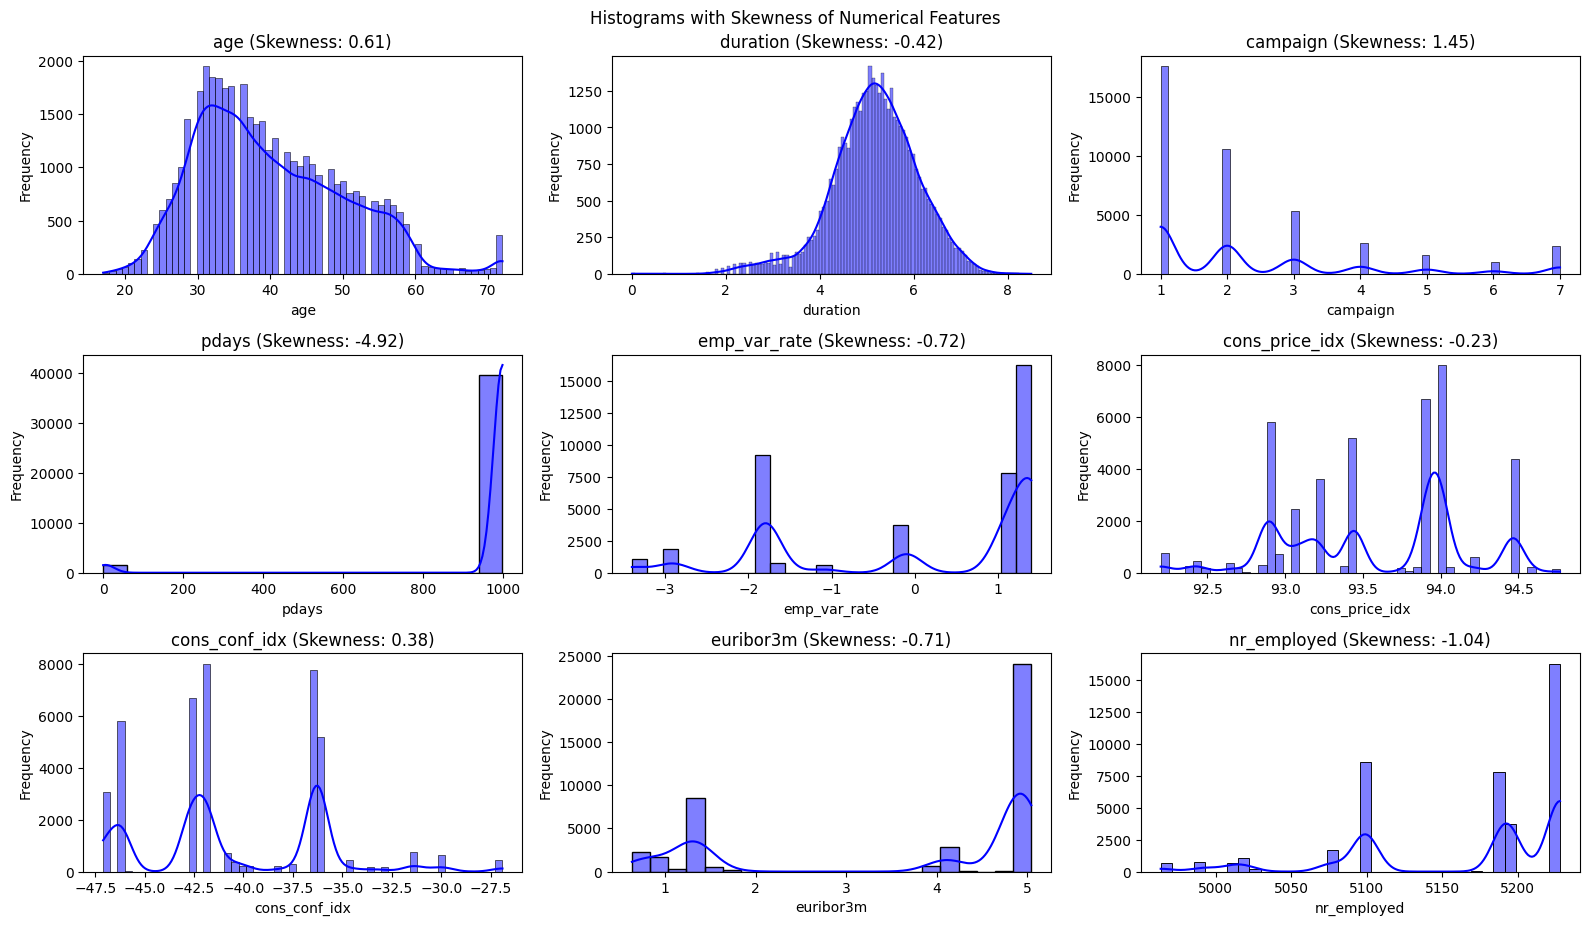

In [43]:
#Histogram plot of numerical columns
# Set up the figure and axes
plt.figure(figsize=(16, 12))
# Loop through each numerical feature to plot its histogram
for i, col in enumerate(df_num):
    plt.subplot(4, 3, i+1)  # Adjust the number of rows and columns based on the number of features
    sns.histplot(data_fd[col], kde=True, color='blue', edgecolor='black')
    plt.title(f'{col} (Skewness: {data_fd[col].skew():.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Histograms with Skewness of Numerical Features')
plt.tight_layout()
plt.show()

1. **Age:**
- **Skewness: 0.61 (Moderately right-skewed)**.The distribution is slightly skewed to the right, with a majority of the clients between 30 and 60 years old. The cap at 72 seems to have moderated the extreme outliers, but the skewness suggests a potential for further normalization if needed.
2. **Duration:**
- **Skewness: -0.42 (Slightly left-skewed)**.After log transformation, the duration is more symmetric. The transformation has effectively reduced the impact of long call durations, making the distribution more normal-like.
3. **Campaign:**
- **Skewness: 1.45 (Right-skewed)**.The campaign feature remains right-skewed even after capping. Most clients were contacted only a few times, with a tail for higher contacts. The skewness indicates that extreme values are still present, but they are now controlled.
4. **Pdays:**
- **Skewness: -4.92 (Highly left-skewed)**.The extreme skewness is due to the large number of clients who were not contacted in previous campaigns (represented by 999). This suggests that the distribution is highly imbalanced, and separating these cases into a different category was a good approach.
5. **Emp_var_rate:**
- **Skewness: -0.72 (Moderately left-skewed)**.The employment variation rate shows a somewhat left-skewed distribution, indicating that lower employment variation rates are more frequent.
6. **Cons_price_idx:**
- **Skewness: -0.23 (Nearly symmetric)**.The consumer price index is nearly symmetric, with minor deviations. No significant skewness is observed, indicating a relatively balanced distribution.
7. **Cons_conf_idx:**
- **Skewness: 0.38 (Slightly right-skewed)**.The consumer confidence index has a slight right skew, with several peaks, indicating different economic conditions. The capping of extreme negative values has moderated the distribution.
8. **Euribor3m:**
- **Skewness: -0.71 (Moderately left-skewed)**.The Euribor 3-month rate is moderately left-skewed, suggesting that lower interest rates are more common. The distribution is multimodal, reflecting various economic conditions over time.
9. **Nr_employed:**
- **Skewness: -1.04 (Left-skewed)**.The number of employed persons is left-skewed, with a higher frequency of lower values. This may indicate the effect of economic conditions where employment was relatively low.

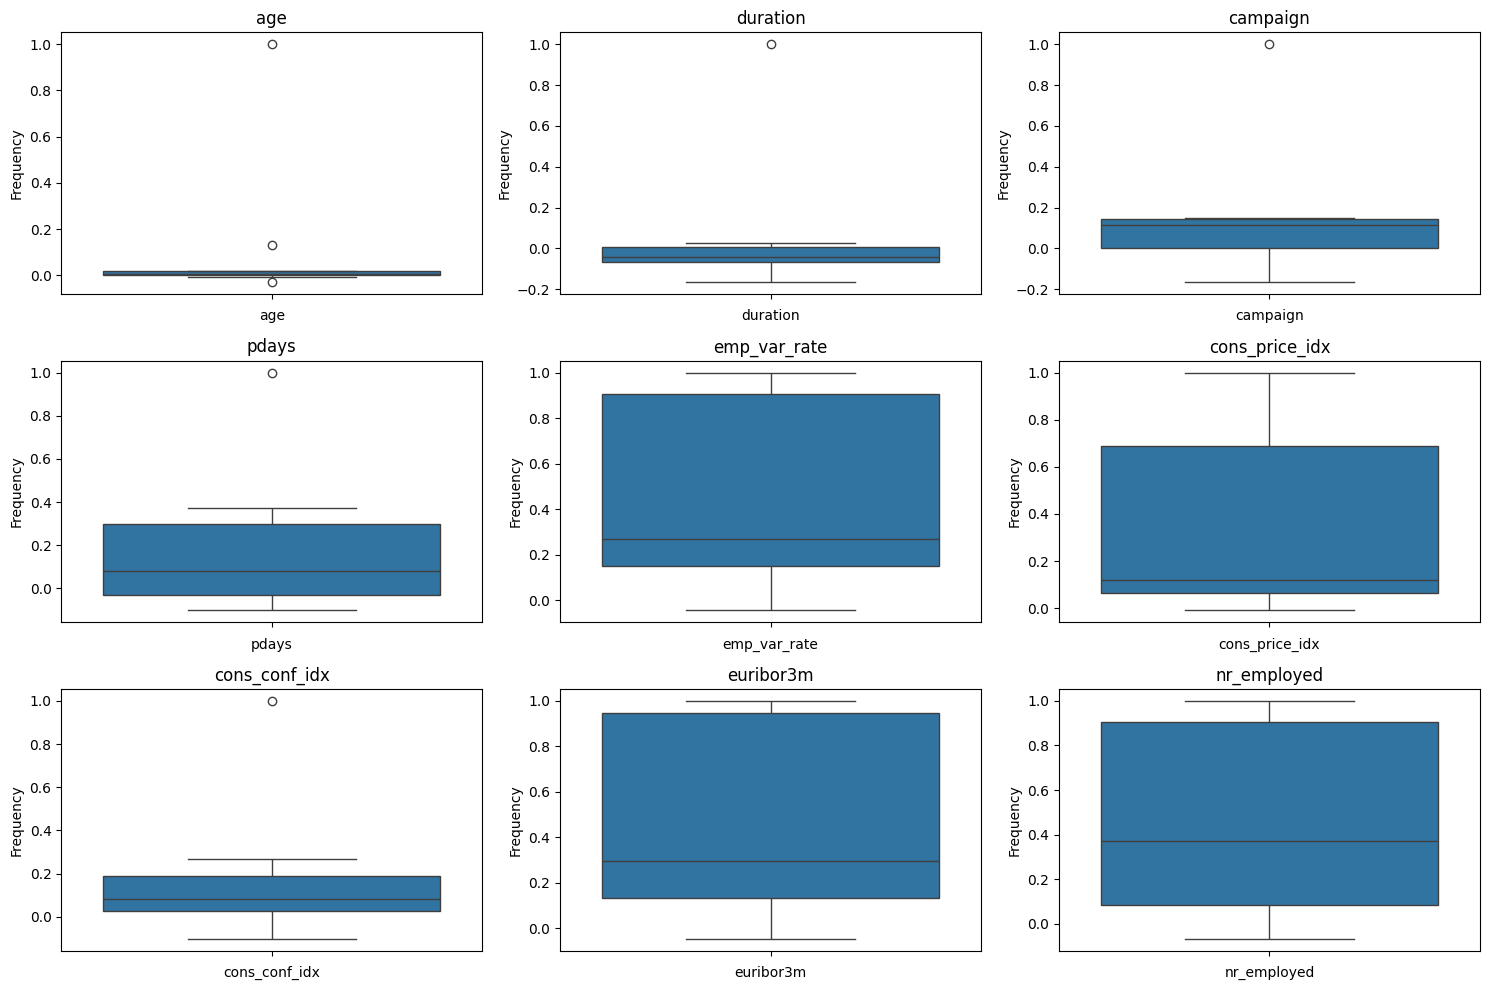

In [46]:
#Boxplot for numerical columns
def plot_numerical_boxplot(df, columns, rows=3, cols=3): # Increased rows to 3 to accomodate 9 plots
    """
    Function to plot the distributions of numerical columns in a DataFrame using subplots.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of numerical columns to plot.
    rows (int): Number of rows in the subplot grid.
    cols (int): Number of columns in the subplot grid.
    """

    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(df[col], ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
plot_numerical_boxplot(df_num,df_num.columns, rows=3, cols=3)

- **Outliers:** Most variables show a few outliers, particularly **age, duration, and campaign**. These outliers are expected due to the nature of the data, though the capping and transformations have managed to keep them under control.
- **Balanced Distributions:** Variables like **emp_var_rate, cons_price_idx, euribor3m, and nr_employed** exhibit well-contained distributions without outliers, indicating stable economic conditions for these features.

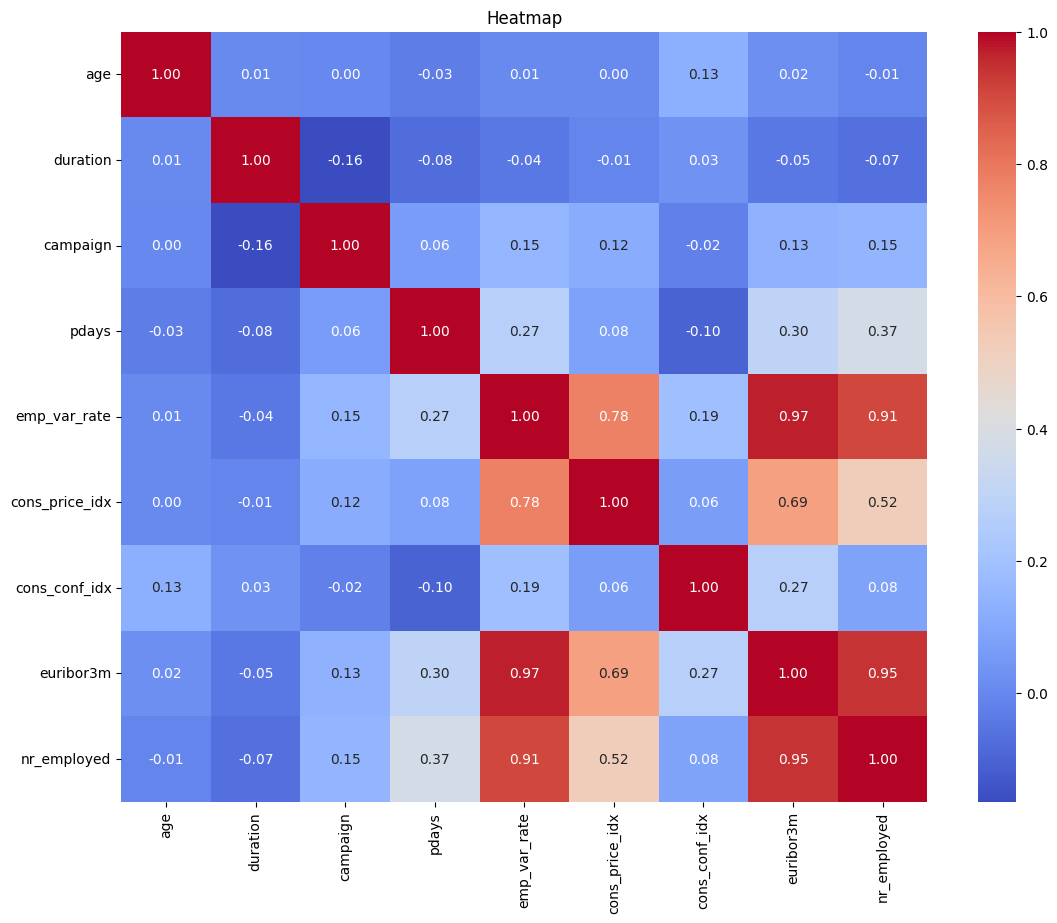

In [50]:
##Correlation Heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(df_num,annot=True,fmt=".2f", cmap='coolwarm')
plt.title("Heatmap")
plt.show()

**Strong Positive Correlations:**
- **emp_var_rate & euribor3m (0.97):** A strong correlation suggests that these two economic indicators move closely together, likely reflecting broader economic conditions.
- **emp_var_rate & nr_employed (0.91):** This strong correlation indicates that the employment rate is closely tied to the economic variables measured by the employment variation rate.
- **euribor3m & nr_employed (0.95):** Another strong correlation, showing that the interest rate is closely related to employment levels, which is expected as interest rates can influence job creation.

In [58]:
from scipy.stats import pointbiserialr

target_variable = 'y'
correlations = {}

for col in data_cleaned.columns:
    if data_cleaned[col].dtype != 'object':  # Ensure the variable is numeric
        corr, _ = pointbiserialr(data_cleaned[col], y[target_variable])
        correlations[col] = corr

# Convert to DataFrame and visualize
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'Correlation with Target'])
print(corr_df)

KeyError: 'y'

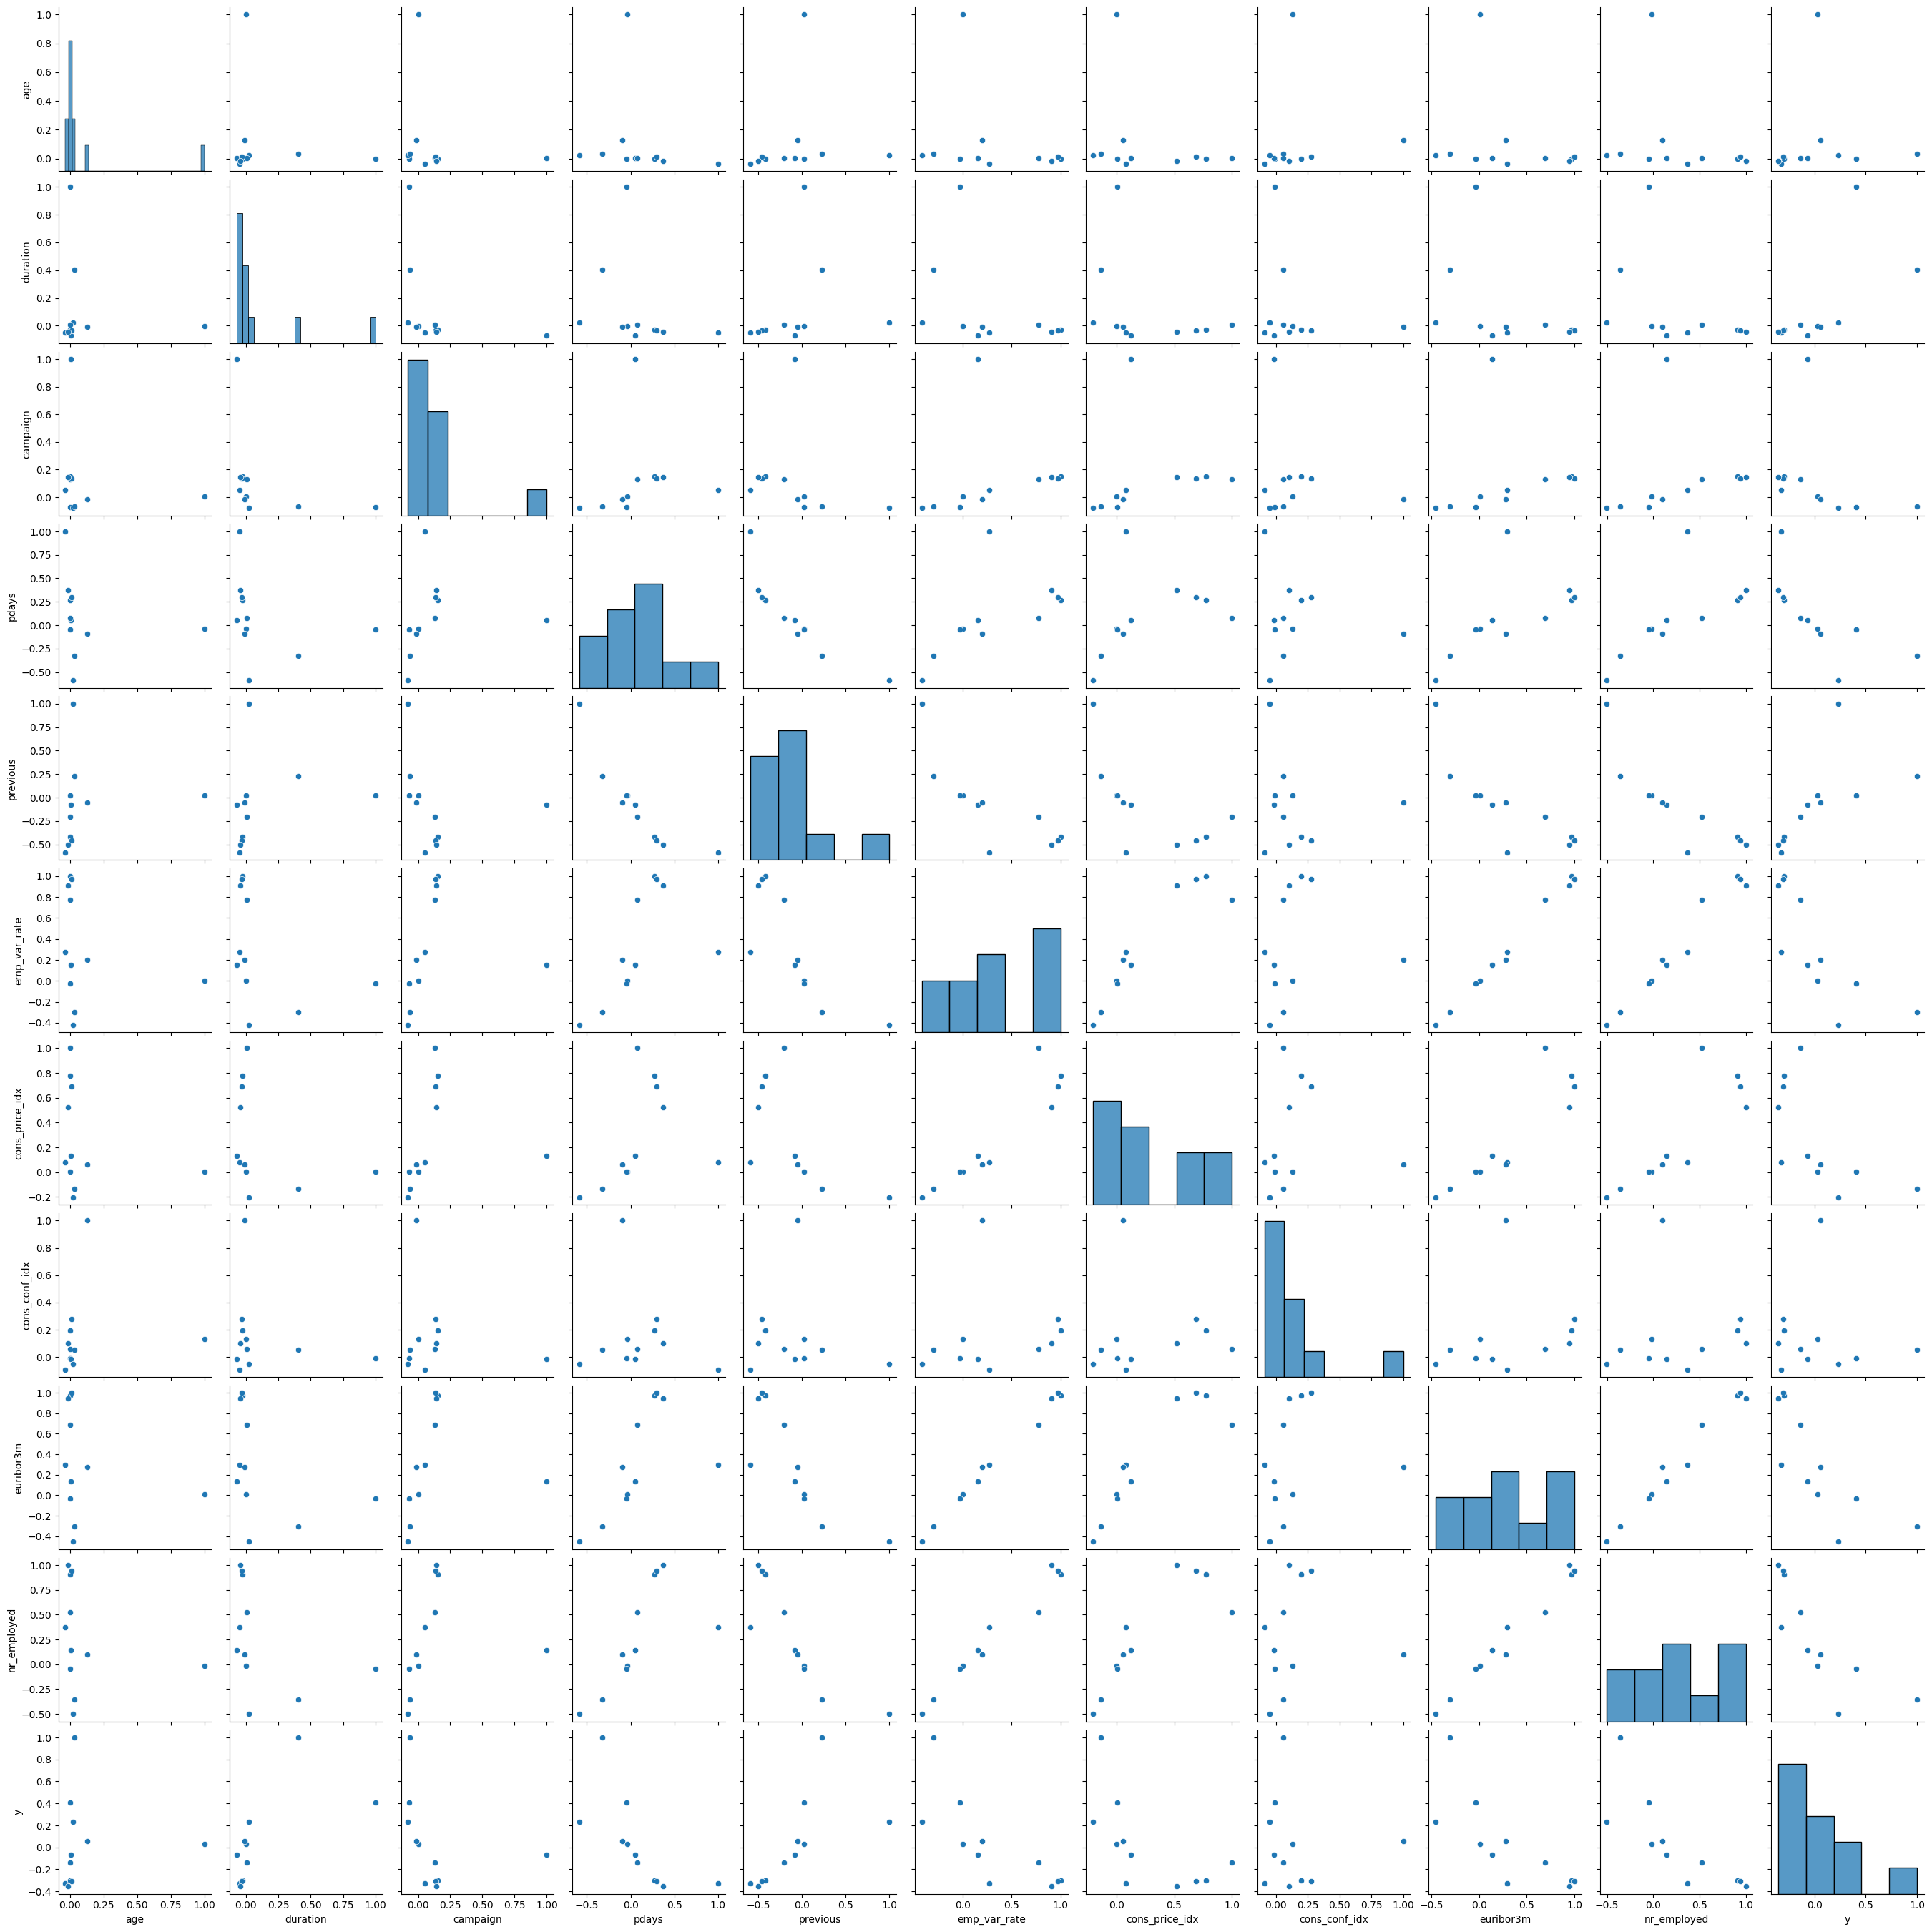

In [ ]:
sns.pairplot(df_num)

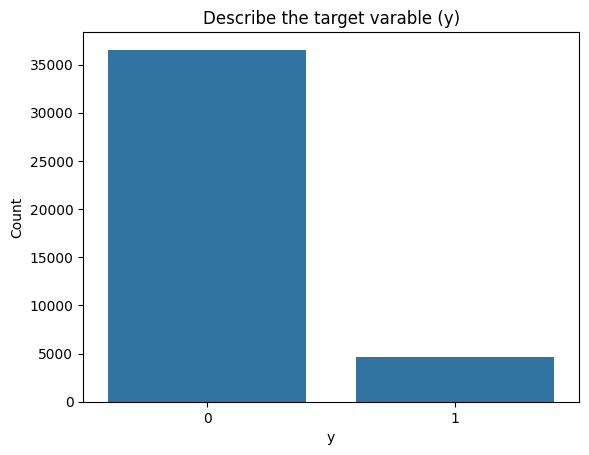

In [ ]:
# Describe the target varable
sns.countplot(x='y',data=data_fd)
plt.xlabel("y")
plt.ylabel("Count")
plt.title("Describe the target varable (y)")
plt.show()

##Univariate analysis of a numerical data

##Univariate analysis of a Categorical data

In [ ]:
data_fd

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [ ]:
data_fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp_var_rate    41188 non-null  float64 
 16  cons_price_idx  41188 non-null  float64 
 17  cons_conf_id

In [ ]:
category =data_fd.select_dtypes(include=['category'])
category.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent,0
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent,0
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success,1
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent,0
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success,1


In [ ]:
df =data_fd['job'].value_counts().reset_index()
df

,job,count
0,admin.,10422
1,blue-collar,9254
2,technician,6743
3,services,3969
4,management,2924
5,retired,1720
6,entrepreneur,1456
7,self-employed,1421
8,housemaid,1060
9,unemployed,1014


In [ ]:
df =data_fd['education'].value_counts().reset_index()
df

,education,count
0,university.degree,12168
1,high.school,9515
2,basic.9y,6045
3,professional.course,5243
4,basic.4y,4176
5,basic.6y,2292
6,unknown,1731
7,illiterate,18


In [ ]:
df =data_fd['marital'].value_counts().reset_index()
df

,marital,count
0,married,24928
1,single,11568
2,divorced,4612
3,unknown,80




**marital**

In this marital status 41188 out of 24928 person's are  married and 11568 are single and 4612 are divorced also in this data  80 person are unknown








In [ ]:
data_fd['loan'].value_counts()

,count
loan,
no,33950
yes,6248
unknown,990


In [ ]:
data_fd[['job', 'marital']].value_counts().reset_index()

,job,marital,count
0,blue-collar,married,6687
1,admin.,married,5253
2,admin.,single,3875
3,technician,married,3670
4,services,married,2294
5,technician,single,2287
6,management,married,2089
7,blue-collar,single,1825
8,admin.,divorced,1280
9,retired,married,1274


In [ ]:
data_fd['contact'].value_counts()

,count
contact,
cellular,26144
telephone,15044


In [ ]:
data_fd['poutcome'].value_counts()

,count
poutcome,
nonexistent,35563
failure,4252
success,1373


In [ ]:
data_fd[['duration', 'month']].value_counts()

duration  month
136       may      61
159       may      59
166       may      58
109       may      58
87        may      56
                   ..
595       oct       1
          sep       1
596       apr       1
          jun       1
4918      nov       1
Name: count, Length: 6794, dtype: int64

In [ ]:
fd = data_fd[['job', 'education']].value_counts().reset_index()
fd

,job,education,count
0,admin.,university.degree,5753
1,blue-collar,basic.9y,3623
2,admin.,high.school,3329
3,technician,professional.course,3320
4,services,high.school,2682
...,...,...,...
85,retired,illiterate,3
86,self-employed,illiterate,3
87,entrepreneur,illiterate,2
88,admin.,illiterate,1


In [ ]:
fd = data_fd[['housing', 'loan']].value_counts().reset_index()
fd

,housing,loan,count
0,yes,no,17885
1,no,no,16065
2,yes,yes,3691
3,no,yes,2557
4,unknown,unknown,990


In [ ]:
fd = data_fd[['job', 'loan']].value_counts().reset_index()
fd

,job,loan,count
0,admin.,no,8485
1,blue-collar,no,7648
2,technician,no,5607
3,services,no,3267
4,management,no,2414
5,admin.,yes,1710
6,retired,no,1436
7,blue-collar,yes,1366
8,entrepreneur,no,1214
9,self-employed,no,1186


Text(0.5, 1.0, 'job vs loan')

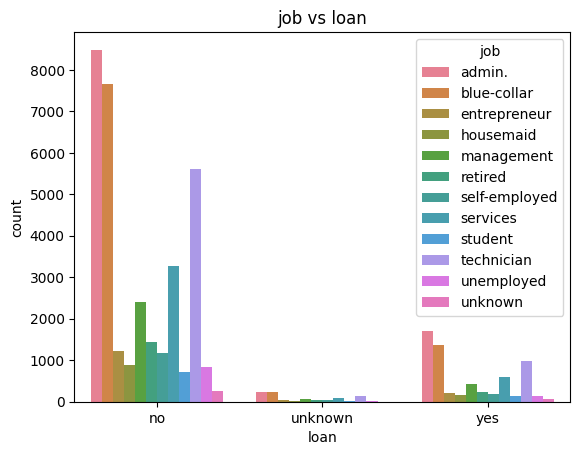

In [ ]:
sns.countplot(x='loan',  hue = 'job' ,data=data_fd)
plt.title('job vs loan')


In [ ]:
fd = data_fd[['age','job', 'loan']].value_counts().reset_index()
fd

,age,job,loan,count
0,31,admin.,no,487
1,33,admin.,no,484
2,32,admin.,no,460
3,29,admin.,no,459
4,30,admin.,no,426
...,...,...,...,...
1325,26,student,unknown,1
1326,43,unemployed,unknown,1
1327,17,student,unknown,1
1328,44,admin.,unknown,1


Text(0.5, 1.0, ' job')

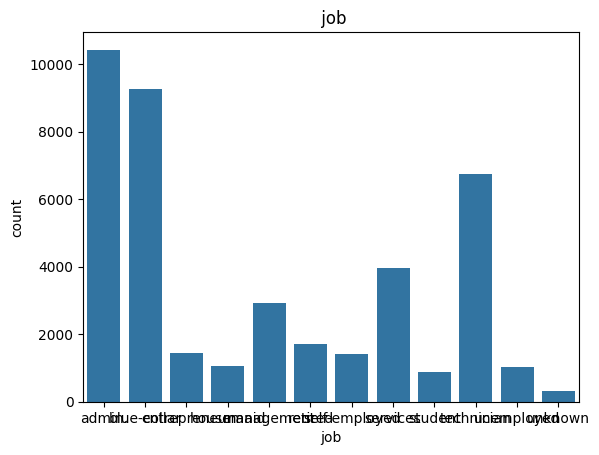

In [ ]:
sns.countplot(x='job',  data=data_fd)
plt.title(' job')

In [ ]:
fd = data_fd[['marital', 'y']].value_counts().reset_index()
fd

,marital,y,count
0,married,0,22396
1,single,0,9948
2,divorced,0,4136
3,married,1,2532
4,single,1,1620
5,divorced,1,476
6,unknown,0,68
7,unknown,1,12


Text(0.5, 1.0, ' marital vs y')

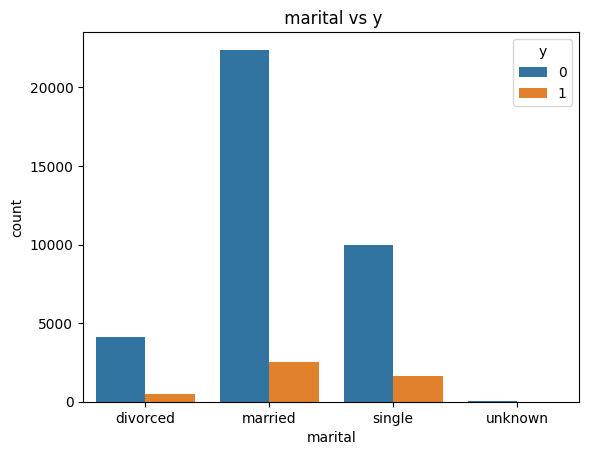

In [ ]:
sns.countplot(x='marital', hue = 'y', data=data_fd)
plt.title(' marital vs y')

Text(0.5, 1.0, 'Distribution of Target Variable (y)')

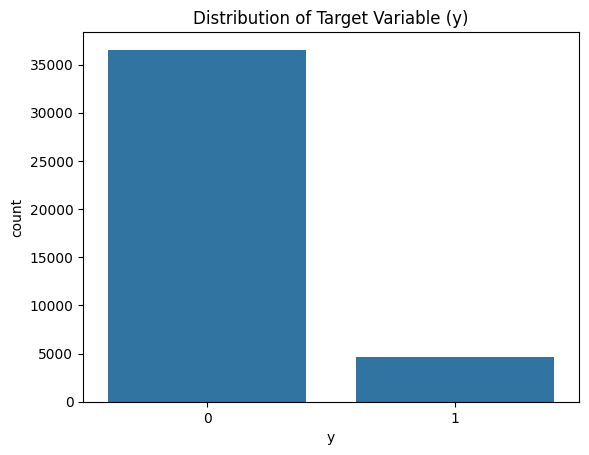

In [ ]:
# Set up the figure
# fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Plot the distribution of the target variable 'y'
sns.countplot(x='y', data=data_fd)
plt.title('Distribution of Target Variable (y)')

In [ ]:
data_fd['month'].value_counts()

,count
month,
may,13769
jul,7174
aug,6178
jun,5318
nov,4101
apr,2632
oct,718
sep,570
mar,546


In [ ]:
data_fd['day_of_week'].value_counts()

,count
day_of_week,
thu,8623
mon,8514
wed,8134
tue,8090
fri,7827


<Axes: xlabel='day_of_week', ylabel='count'>

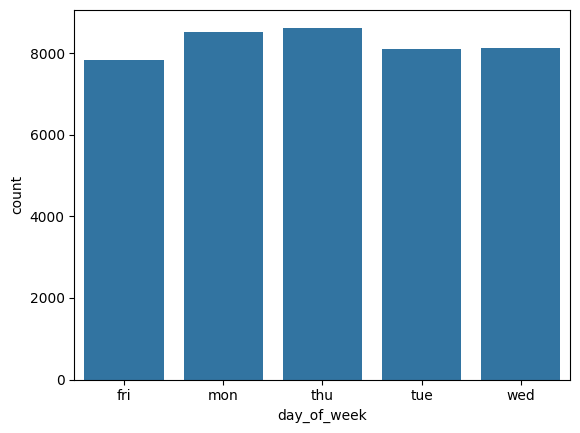

In [ ]:
sns.countplot(x = 'day_of_week' , data = data_fd )

In [ ]:
data_fd[['month', 'day_of_week']].value_counts().reset_index()

,month,day_of_week,count
0,may,wed,2923
1,may,fri,2858
2,may,tue,2809
3,may,mon,2642
4,may,thu,2537
5,jul,thu,1672
6,jul,tue,1517
7,jul,mon,1516
8,jul,wed,1457
9,aug,thu,1347


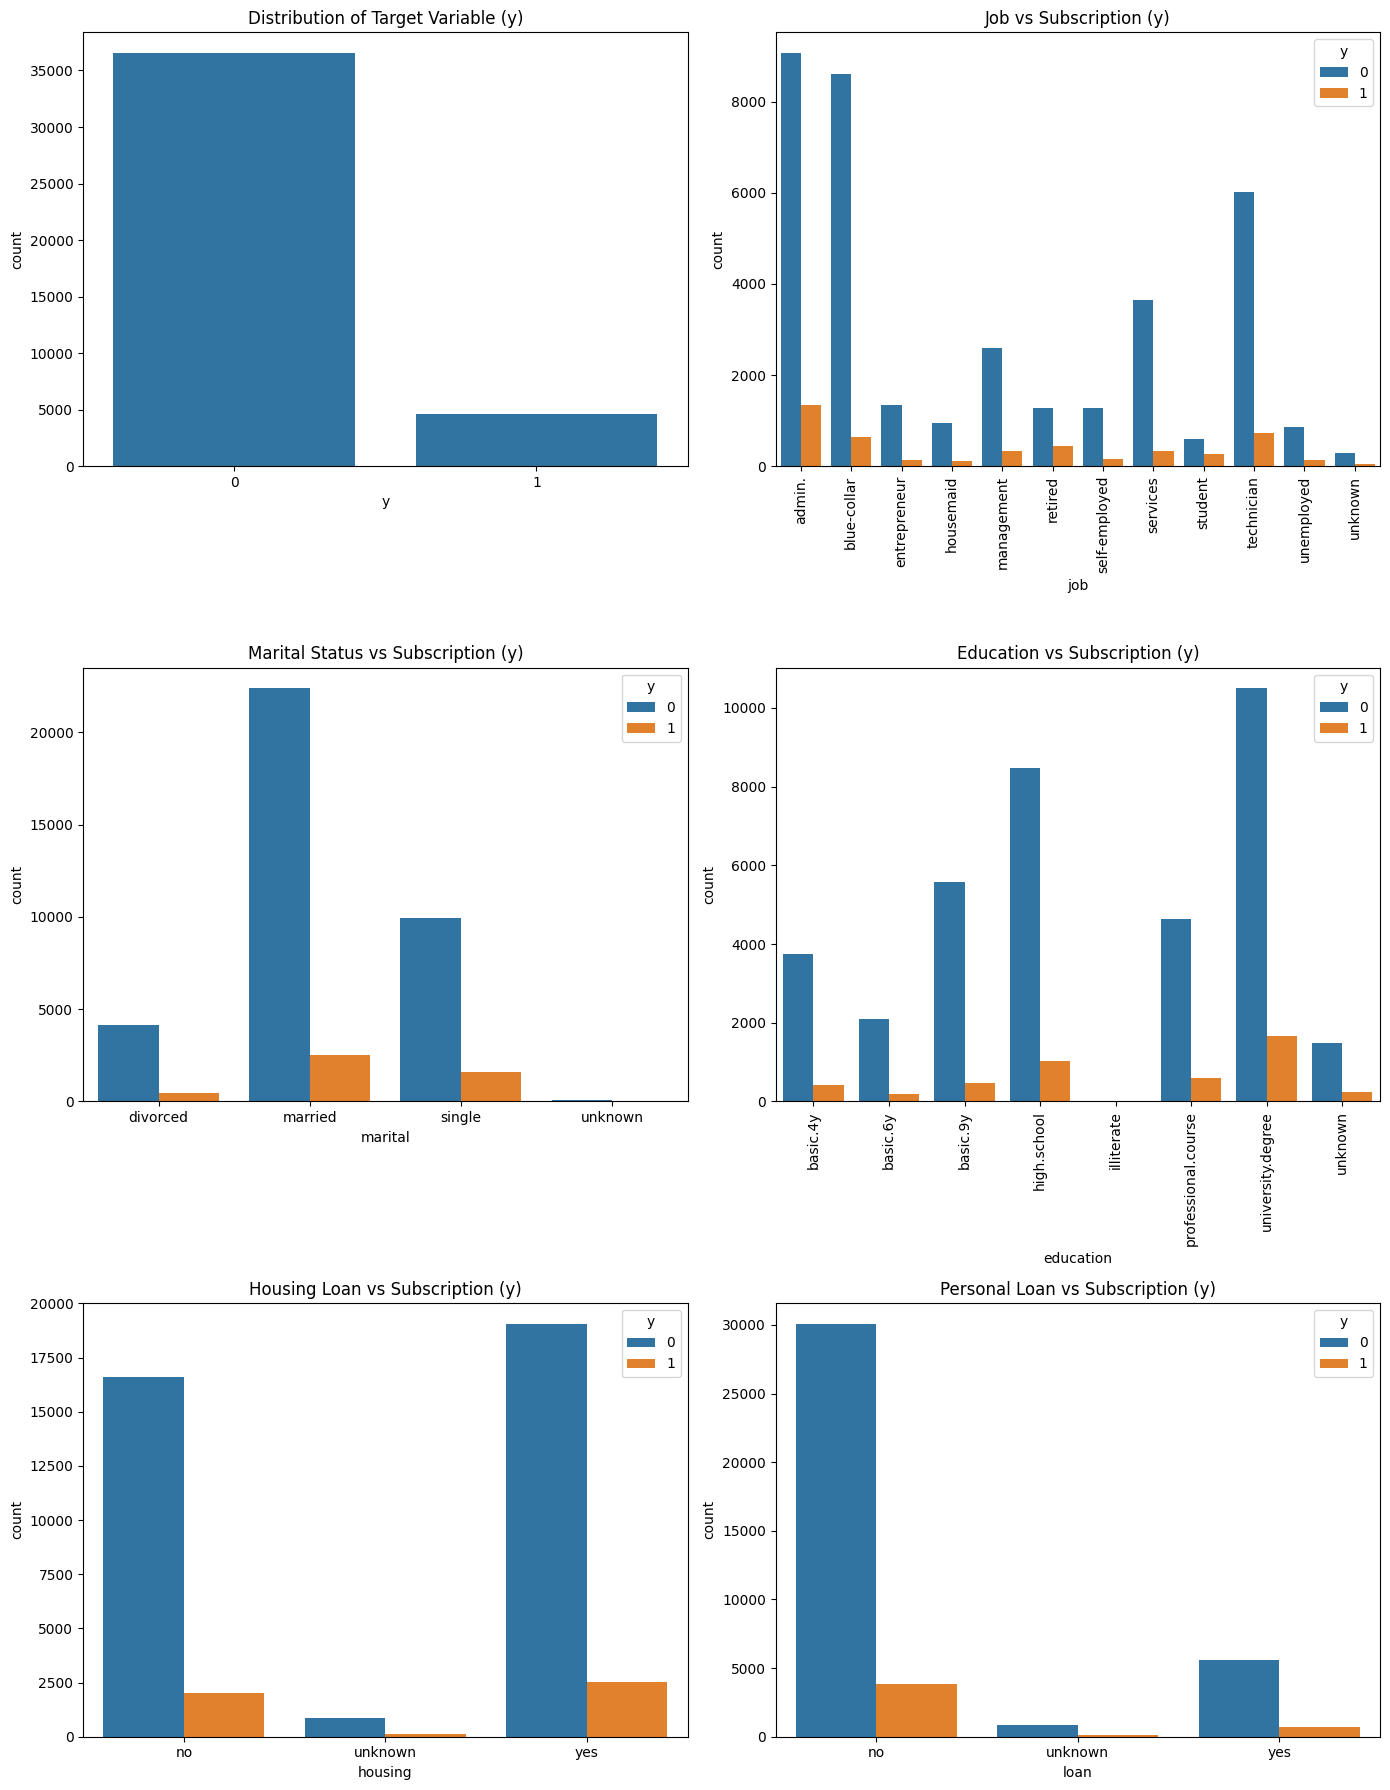

In [ ]:
# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Plot the distribution of the target variable 'y'
sns.countplot(x='y', data=data_fd, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Target Variable (y)')

# Plot job vs y
sns.countplot(x='job', hue='y', data=data_fd, ax=axes[0, 1])
axes[0, 1].set_title('Job vs Subscription (y)')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot marital status vs y
sns.countplot(x='marital', hue='y', data=data_fd, ax=axes[1, 0])
axes[1, 0].set_title('Marital Status vs Subscription (y)')

# Plot education vs y
sns.countplot(x='education', hue='y', data=data_fd, ax=axes[1, 1])
axes[1, 1].set_title('Education vs Subscription (y)')
axes[1, 1].tick_params(axis='x', rotation=90)

# Plot housing loan vs y
sns.countplot(x='housing', hue='y', data=data_fd, ax=axes[2, 0])
axes[2, 0].set_title('Housing Loan vs Subscription (y)')

# Plot loan vs y
sns.countplot(x='loan', hue='y', data=data_fd, ax=axes[2, 1])
axes[2, 1].set_title('Personal Loan vs Subscription (y)')

plt.tight_layout()
plt.show()

##Bivariate analysis

##Multivariate analysis

In [ ]:
data_fd

NameError: name 'data_fd' is not defined